In [1]:
from IPython.display import YouTubeVideo

# Understanding word embeddings

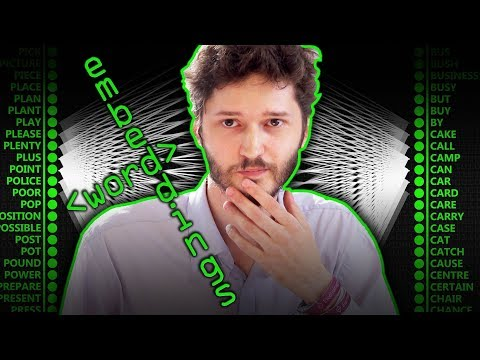

In [2]:
YouTubeVideo('gQddtTdmG_8', width=800, height=500)

# Understanding sentence embeddings conceptually and their relationship to transformers

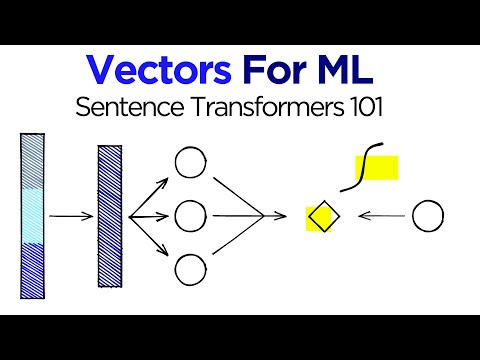

In [3]:
YouTubeVideo('WS1uVMGhlWQ', width=800, height=500)

There are many more resources out there

# Other things that are possible, e.g., multi-lingual mappings

https://towardsdatascience.com/cutting-edge-bert-nlp-model-bb0bfc8b7aec

# Embedding sentences

[Reference](https://huggingface.co/sentence-transformers)

In [4]:
# Run this first and remove the #
#!pip install -U sentence-transformersp

In [5]:
# Get model
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2', device='cpu')

In [6]:
#Example sentences to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.', 
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.76214471e-01  1.20601349e-01 -2.93623805e-01 -2.29858100e-01
 -8.22927579e-02  2.37709269e-01  3.39985222e-01 -7.80964494e-01
  1.18127652e-01  1.63374126e-01 -1.37715369e-01  2.40282476e-01
  4.25125539e-01  1.72417805e-01  1.05279632e-01  5.18163919e-01
  6.22219034e-02  3.99285764e-01 -1.81652397e-01 -5.85578680e-01
  4.49721813e-02 -1.72750503e-01 -2.68443853e-01 -1.47386223e-01
 -1.89217791e-01  1.92150488e-01 -3.83842468e-01 -3.96006793e-01
  4.30648834e-01 -3.15319806e-01  3.65949839e-01  6.05159067e-02
  3.57326001e-01  1.59736380e-01 -3.00984025e-01  2.63250232e-01
 -3.94311249e-01  1.84855595e-01 -3.99549067e-01 -2.67889678e-01
 -5.45117438e-01 -3.13404649e-02 -4.30644006e-01  1.33278236e-01
 -1.74793854e-01 -4.35465515e-01 -4.77379113e-01  7.12557063e-02
 -7.37000853e-02  5.69137096e-01 -2.82579631e-01  5.24974242e-02
 -8.20007861e-01  1.98297054e-01  1.69511855e-01  2.71779954e-01
  2.64611

# Let's embed some tweets!

[Dataset info](http://help.sentiment140.com/for-students)

In [7]:
!wget -nc http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip -O tweets.zip

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
File ‘tweets.zip’ already there; not retrieving.


In [8]:
!unzip -n tweets.zip

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Archive:  tweets.zip


In [9]:
import pandas as pd
from scipy import spatial
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('testdata.manual.2009.06.14.csv', header=None, usecols=[2, 4, 5])
df.columns = ['timestamp', 'user', 'tweet']

In [11]:
df['embedding'] = df.tweet.map(lambda x: model.encode(x))

# What can we do with this?

## Find similar sentences for a given sentence!

In [12]:
def cos_sim(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [13]:
print(df.tweet.values[15])

#lebron best athlete of our generation, if not all time (basketball related) I don't want to get into inter-sport debates about   __1/2


In [14]:
ref_emb = df.embedding[15]

In [15]:
best = 10e-10
best_i = None
for i, check_emb in enumerate(df.embedding):
    if ref_emb is check_emb:
        continue
    check_sim = cos_sim(ref_emb, check_emb)
    if check_sim > best:
        best = check_sim
        best_i = i

In [16]:
print(df.tweet.values[best_i])

@khalid0456 No, Lebron is the best


## Clustering

In [17]:
# Create dataset of vectors for t-SNE
tsne_vectors = np.array(list(df['embedding']))

# Train t-SNE
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000, random_state=0)
tsne_results = tsne.fit_transform(tsne_vectors)

/home/cbo/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/cbo/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


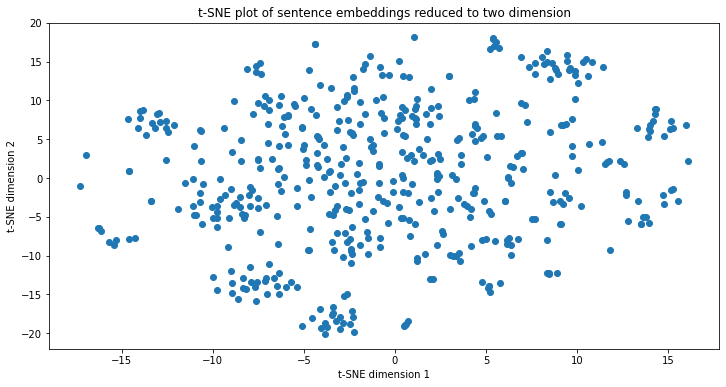

In [18]:
# Plot results
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.scatter(tsne_results[:, 0], tsne_results[:, 1])
ax.set_title('t-SNE plot of sentence embeddings reduced to two dimension')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')
plt.show()

In [19]:
# Cluster on two dimensions
algo = KMeans(
    init="random",
    n_clusters=30,
    n_init=10,
    max_iter=300,
    random_state=42
)
algo.fit(tsne_results)

KMeans(init='random', n_clusters=30, random_state=42)

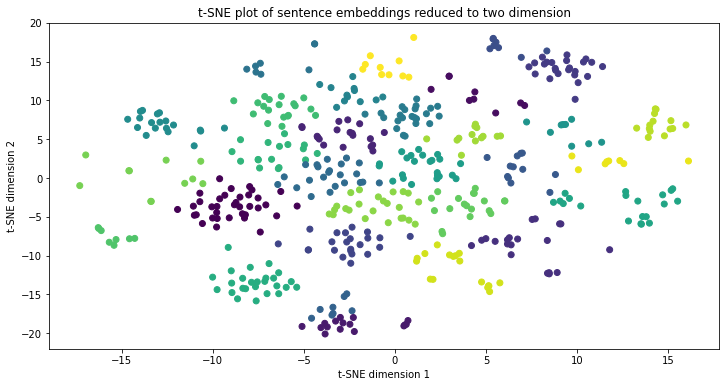

In [20]:
# Plot results
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c =  algo.labels_)
ax.set_title('t-SNE plot of sentence embeddings reduced to two dimension')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')
plt.show()

In [21]:
for tweet in df.tweet.values[algo.labels_==5]:
    print(tweet)

watching Night at The Museum . Lmao
i loved night at the museum!!!
going to see the new night at the museum  movie with my family oh boy a three year old in the movies fuin
just got back from the movies.  went to see the new night at the museum with rachel.  it was good
Just saw the new Night at the Museum movie...it was...okay...lol 7\10
Going to see night at the museum 2 with tall boy
@shannyoday I will take you on a date to see night at the museum 2 whenever you want...it looks soooooo good
no watching The Night At The Museum. Getting Really Good
Night at the Museum, Wolverine and junk food - perfect monday!
saw night at the museum 2 last night.. pretty crazy movie.. but the cast was awesome so it was well worth it. Robin Williams forever!
I saw Night at the Museum: Battle of the Swithsonian today. It was okay. Your typical [kids] Ben Stiller movie.
Taking Katie to see Night at the Museum.  (she picked it)
Night at the Museum tonite instead of UP. :( oh well. that 4 yr old better en

## Comparing average vectors of clusters to compare topics

In [22]:
# labels are 0-indexed
avg_vectors = {i: np.mean(df[algo.labels_==i]['embedding']) for i in range(50)}

In [23]:
# Let's find a similar topic to the example topic above
best = 10e-10
best_i = None
ref_emb = avg_vectors[5]
for i in range(50):
    check_emb = avg_vectors[i]
    if ref_emb is check_emb:
        continue
    check_sim = cos_sim(ref_emb, check_emb)
    if check_sim > best:
        best = check_sim
        best_i = i

In [24]:
for tweet in df.tweet.values[algo.labels_==best_i]:
    print(tweet)

@YarnThing you will not regret going to see Star Trek. It was AWESOME!
On my way to see Star Trek @ The Esquire.
Going to see star trek soon with my dad.
Went to see the Star Trek movie last night.  Very satisfying.
I can't wait, going to see star trek tonight!!
Star Trek was as good as everyone said!!
saw night at the museum out of sheer desperation. who is funding these movies?
Back from seeing 'Star Trek' and 'Night at the Museum.' 'Star Trek' was amazing, but 'Night at the Museum' was; eh.


## And much more...

... I will leave that to you ;-)

Any questions or follow-ups:

www.cborchers.com
<br>
[cborcher@cs.cmu.edu](mailto:cborcher@cs.cmu.edu)
<br>
www.twitter.com/conradborchers